# JK301 - Audiovisual Transcription Exploratory  Project

This project was developed to explore the feasability and issues related to the collection of full verbal and transcription report of videos of naturally spoken English sentences. The typed transcriptions were spell-corrected, aligned at the word and phonemic level and compared to the original text of the spoken sentences. The transcription accuracy each phoneme and word in each sentenece was coded to allow us to estimate the accuracy of the listener at multiple levels of processing over the course of each sentence.    

1. Questions for JK301:

     1. Is the system sufficiently robust against common spelling errors?
     
     2. Is the system correctly grading word errors?
     
     3. How well can normal hearing participants report the sentence words spoken without noise? 





### How well can normal hearing participants report the sentence words spoken without noise? 

First, let's load in the data and select only the trials without background noise.

In [1]:
#Load Big P
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
#plt.style.use('ggplot')

from statsmodels.nonparametric.smoothers_lowess import lowess 



bigP = pd.DataFrame.from_csv(os.path.normpath(r'C:\TCDTIMIT\dataOut\JK301\bigPJK301_r1.csv'))

#Recalculate word accuracy based on phoneme accuracy
allPhonsMatch = bigP.groupby('WordCount')['PhonemeHitBool'].transform(lambda x: np.mean(x) ==1)
allPhonsMatch.name = 'AllPhonsMatch'
bigP = bigP.join(allPhonsMatch)


isClear = bigP['BabbleCond'] == 'Off'
isNoisy = bigP['BabbleCond'] == 'On'

#Select only clear trials
bigP = bigP[isClear]

#Group by subject
groupedSubject = bigP.groupby('Subject')

#Mean values
subjectMean = groupedSubject['PhonemeHitBool'].mean()




We can plot the accuracy (fraction of words correctly reported) for each participant. 

In [2]:
#Make plots prettier
#Edited from Randel Olson and many at StackOverflow
# These are the "Tableau 20" colors as RGB.    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 


plt.rc('text', color = 'black') 
plt.rc('font', family='sans-serif') 
plt.rc('font', serif='Helvetica Neue') 
plt.rc('axes', titlesize = 18, labelsize = 14,labelcolor ='black')  
plt.rc('lines', linewidth=2,markersize = 10)
plt.rc('xtick',labelsize = 10,color ='black')
plt.rc('ytick',labelsize = 10,color ='black')
def hide_spines():
    """Hides the top and rightmost axis spines from view for all active
    figures and their respective axes."""

    # Retrieve a list of all current figures.
    figures = [x for x in plt._pylab_helpers.Gcf.get_all_fig_managers()]
    for figure in figures:
        # Get all Axis instances related to the figure.
        for ax in figure.canvas.figure.get_axes():
            # Disable spines.
            ax.spines['right'].set_color('none')
            ax.spines['top'].set_color('none')
            # Disable ticks.
            ax.xaxis.set_ticks_position('bottom')
            ax.yaxis.set_ticks_position('left')




In [3]:
subjectMean

Subject
p001    0.899160
p002    0.808054
p003    0.822222
p004    0.775148
p005    0.913799
p006    0.867526
p007    0.807127
p008    0.912007
p009    0.938148
Name: PhonemeHitBool, dtype: float64

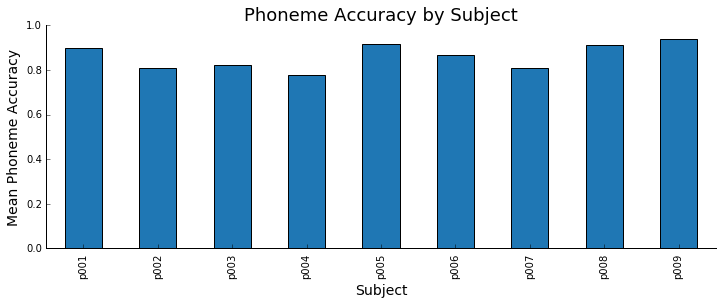

In [4]:
%matplotlib inline
ax = subjectMean.plot(kind='bar',figsize = (12,4),title = 'Phoneme Accuracy by Subject',color = tableau20[0])
ax.set_ylabel('Mean Phoneme Accuracy')
hide_spines()

As seen above, the worst particpant (p004) had 78% accuracy. The best had 94% accuracy.

### Are the missed words due to working memory loss?

Let's take a look to see if working memory is playing a role in clear voice transcription errors.

In [5]:
bigP.keys()

Index([u'index', u'Unnamed: 0.1', u'VideoFile', u'TargetSentence', u'Babble',
       u'TrialNum', u'SpellCorrSource', u'SourceSentence', u'Speaker',
       u'SentenceWordScore', u'dBSNR', u'Subject', u'SentenceType',
       u'VideoCond', u'BabbleCond', u'FileName', u'VerbalResponse',
       u'1LogGram', u'2LogGram', u'3LogGram', u'Indx', u'Word', u'UnTrn',
       u'StTrn', u'NSyll', u'NPhon', u'unsDENS', u'unsFDEN', u'unsLDEN',
       u'unsCDEN', u'strDENS', u'strFDEN', u'strLDEN', u'strCDEN', u'unsBPAV',
       u'unsFBPAV', u'unsLBPAV', u'unsCBPAV', u'strBPAV', u'strFBPAV',
       u'strLBPAV', u'strCBPAV', u'unsTPAV', u'unsFTPAV', u'unsLTPAV',
       u'unsCTPAV', u'strTPAV', u'strFTPAV', u'strLTPAV', u'strCTPAV',
       u'unsPOSPAV', u'unsFPOSPAV', u'unsLPOSPAV', u'unsCPOSPAV', u'strPOSPAV',
       u'strFPOSPAV', u'strLPOSPAV', u'strCPOSPAV', u'unsLCPOSPAV',
       u'unsFLCPOSPAV', u'unsLLCPOSPAV', u'unsCLCPOSPAV', u'strLCPOSPAV',
       u'strFLCPOSPAV', u'strLLCPOSPAV', u'strCLCPOSPA

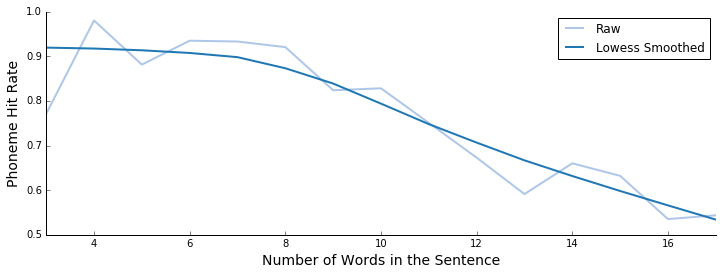

In [6]:
# Make a column for the number of words in the sentence
bigP['NumWordsInSentence'] = bigP.groupby(['SentenceCount'])['WordIdx'].transform(max)+1

#Sort sentence accuracy by number of words
sentenceACC = bigP.groupby(['NumWordsInSentence'])['PhonemeHitBool','NumWordsInSentence'].mean()
sentenceACC.set_index('NumWordsInSentence')
#sentenceACC = sentenceACC.sort_values('NumWordsInSentence')
filtered = lowess(sentenceACC['PhonemeHitBool'],np.arange(0,len(sentenceACC)))
sentenceACC['Filt'] = filtered[:,1]
#accplot = sentenceACC['PhonemeHitBool'].plot(kind='line',figsize = (12,4),color='black')
ax = sentenceACC[['PhonemeHitBool','Filt']].plot(kind='line',figsize = (12,4),color = np.array(tableau20)[[1,0]])
ax.legend(['Raw','Lowess Smoothed'])
ax.set_ylabel('Phoneme Hit Rate')
ax.set_xlabel('Number of Words in the Sentence')
hide_spines()



We can see we get about 30% drop in mean transcription acccuracy from 3 to 17 words!  This means that working memory is a critical factor for longer sentences, even when sentences are spoken clearly. 


Performance is fairly level at around 90% between 4 and 8 words to a sentence. Let's look only at sentences less than 9 words long and see what words these errors are coming from.    

In [7]:
bigPShort  = bigP[bigP['NumWordsInSentence'] < 9]

### Are some talkers harder to understand, even with fewer than 9 words?

Lets look again at individual subject performance, now including only sentences below 9 words. 

In [8]:
#Group by subject
groupedSubject = bigPShort.groupby('Subject')

#Mean values
subjectMean = groupedSubject['PhonemeHitBool'].mean()

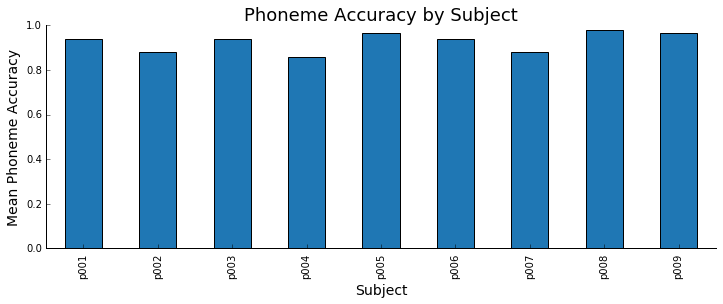

In [9]:
%matplotlib inline
ax = subjectMean.plot(kind='bar',figsize = (12,4),title = 'Phoneme Accuracy by Subject',color = tableau20[0])
ax.set_ylabel('Mean Phoneme Accuracy')
hide_spines()

Nice! The worst performing subject (p004) has 86% phoneme transcription accuracy for clear sentences under 9 words long. Now lets break it down by individual talker. 

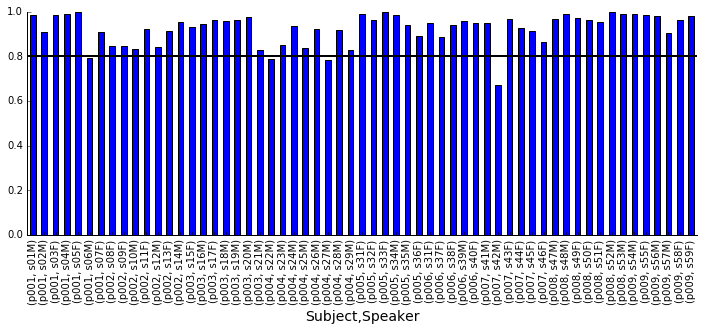

In [10]:
groupedSpeaker = bigPShort.groupby(['Subject','Speaker'])
speakerMean = groupedSpeaker.mean()
ax = speakerMean['PhonemeHitBool'].plot(kind='bar',figsize = (12,4))
plt.axhline(y=.80, xmin=0, xmax=59, linewidth=2, color = 'k')
hide_spines()

Each talker was only heard by one subject, so we won't be able to separate talker from subject completely. However, we could try to figure out which talkers were the most difficult for each subject.

In [11]:
 zscore = lambda x: (x - x.mean()) / x.std()
speakerMean['Zscore'] = 0    
scores = speakerMean['PhonemeHitBool'].reset_index().groupby(['Subject']).transform(zscore)
speakerMean.index.levels[1][speakerMean.index.labels[1]]

Index([u's01M', u's02M', u's03F', u's04M', u's05F', u's06M', u's07F', u's08F',
       u's09F', u's10M', u's11F', u's12M', u's13F', u's14M', u's15F', u's16M',
       u's17F', u's18M', u's19M', u's20M', u's21M', u's22M', u's23M', u's24M',
       u's25M', u's26M', u's27M', u's28M', u's29M', u's31F', u's32F', u's33F',
       u's34M', u's35M', u's36F', u's31F', u's37F', u's38F', u's39M', u's40F',
       u's41M', u's42M', u's43F', u's44F', u's45F', u's46F', u's47M', u's48M',
       u's49F', u's50F', u's51F', u's52M', u's53M', u's54M', u's55F', u's56M',
       u's57M', u's58F', u's59F'],
      dtype='object', name=u'Speaker')

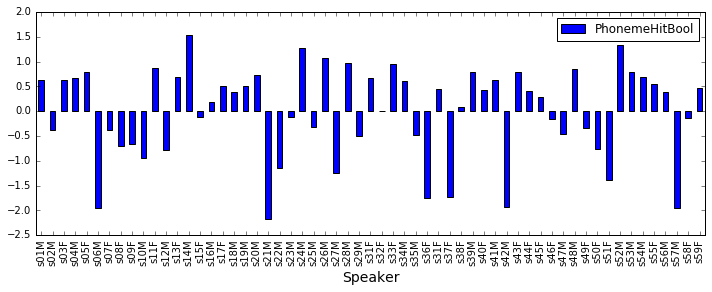

In [12]:
scores.plot(kind='bar',figsize = (12,4),x = speakerMean.index.levels[1][speakerMean.index.labels[1]])
          

Do we exclude speakers with harder to understand speech? Perhaps variation is not a bad thing.

### Which words are participants getting wrong and why?

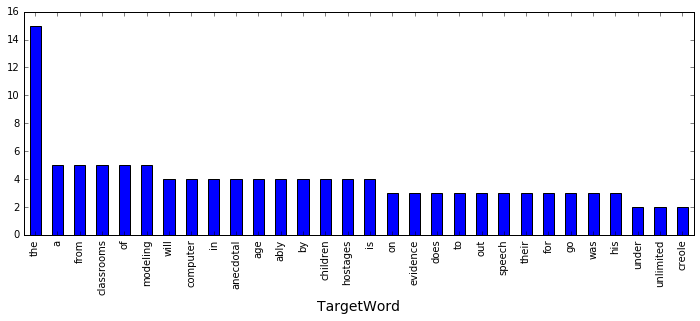

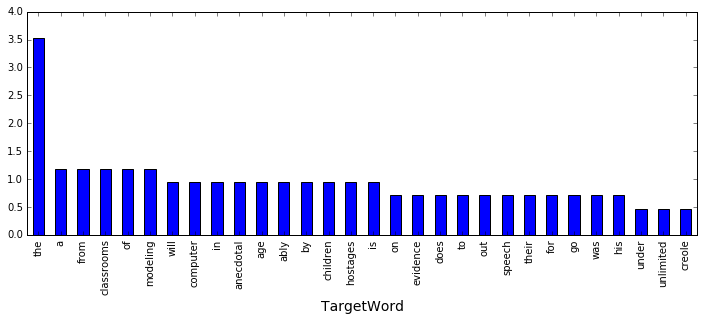

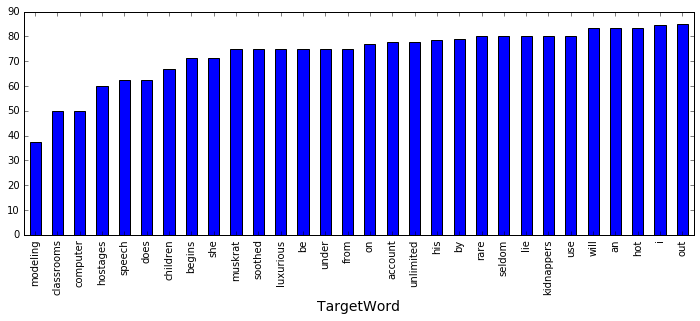

In [13]:

#Grouped by word
groupedWord = bigPShort.groupby('WordCount')

wordACC = groupedWord.mean()['AllPhonsMatch']
words = groupedWord['TargetWord'].first()

#Grouped by Type
wordHits = wordACC.groupby(words).sum()
wordTotal = wordACC.groupby(words).count()
wordHitRate = wordACC.groupby(words).sum()/wordACC.groupby(words).count()
wordMisses = wordTotal-wordHits

missSorted = wordMisses.sort_values(ascending =False)
ax = missSorted[0:30].plot(kind='bar',figsize = (12,4))
plt.figure()
#Misses by word type as a percent of all missed words
missPercSorted = (wordMisses*100/float(wordMisses.sum())).sort_values(ascending =False)
ax = missPercSorted[0:30].plot(kind='bar',figsize = (12,4))
plt.figure()
#Hit rate for the worst hit rate words heard at least 6 times
missPercSorted = (wordHitRate[wordTotal > 6] *100).sort_values(ascending =True)
ax = missPercSorted[0:30].plot(kind='bar',figsize = (12,4))


In [14]:
wordGrouped =  bigPShort.groupby('WordCount')['TargetWord','SourceWord','AllPhonsMatch'].first()
trickyWords = wordGrouped[wordGrouped['TargetWord'].isin(missPercSorted.keys()[0:30])]
trickyWords[trickyWords['AllPhonsMatch'] == False]
missedWordsSpelling = wordGrouped[wordGrouped['AllPhonsMatch'] == False]
missedWordsSpelling
#[missPercSorted.keys()[0:30]]

,TargetWord,SourceWord,AllPhonsMatch
WordCount,,,
275,alfalfa,alphalpha,False
375,from,with,False
417,for,forreal,False
418,real,-,False
515,carl,cara,False
527,tugboats,toads,False
531,hauling,holding,False
537,would,will,False
556,alimony,only,False


A few of the misses seem to be due to spelling errors. But the vast majority of the misses seem to come from the subject reporting the wrong word or not reporting any word. A few correct words are listed as having the wrong phonemes! This is likely due to phoneme alignment dilemas. For instance, the 'ay' in 'holiday' got assigned to the 'a' in 'aprons' when this subject reported 'aprons' as prints. 

In [15]:
bigPShort[bigPShort['WordCount'] == 14237]

,index,Unnamed: 0.1,VideoFile,TargetSentence,Babble,TrialNum,SpellCorrSource,SourceSentence,Speaker,SentenceWordScore,...,SourcePhoneme,PhonemeHitBool,WordCount,WordIdx,TargetWord,SourceWord,WordACC,SentenceCount,AllPhonsMatch,NumWordsInSentence
60113,26,26,C:/TCDTIMIT/volunteersSmall/s54M/straightcam/s...,are holiday aprons available to us,babble18,26,are holiday prints available to us,Are holiday prints available to us,s54M,83.333333,...,HH,True,14237,1,holiday,holiday,1,1812,False,6
60114,26,26,C:/TCDTIMIT/volunteersSmall/s54M/straightcam/s...,are holiday aprons available to us,babble18,26,are holiday prints available to us,Are holiday prints available to us,s54M,83.333333,...,AA,True,14237,1,holiday,holiday,1,1812,False,6
60115,26,26,C:/TCDTIMIT/volunteersSmall/s54M/straightcam/s...,are holiday aprons available to us,babble18,26,are holiday prints available to us,Are holiday prints available to us,s54M,83.333333,...,L,True,14237,1,holiday,holiday,1,1812,False,6
60116,26,26,C:/TCDTIMIT/volunteersSmall/s54M/straightcam/s...,are holiday aprons available to us,babble18,26,are holiday prints available to us,Are holiday prints available to us,s54M,83.333333,...,AH,True,14237,1,holiday,holiday,1,1812,False,6
60117,26,26,C:/TCDTIMIT/volunteersSmall/s54M/straightcam/s...,are holiday aprons available to us,babble18,26,are holiday prints available to us,Are holiday prints available to us,s54M,83.333333,...,D,True,14237,1,holiday,holiday,1,1812,False,6
60118,26,26,C:/TCDTIMIT/volunteersSmall/s54M/straightcam/s...,are holiday aprons available to us,babble18,26,are holiday prints available to us,Are holiday prints available to us,s54M,83.333333,...,-,False,14237,1,holiday,holiday,1,1812,False,6


I can correct this issue by setting all phonemes of exact word matches to the target phonemes.

In [20]:
# Find where words match
matchIdx = bigPShort['SourceWord'] == bigPShort['TargetWord']
#Set the source phonemes to match the target
bigPShort.loc[matchIdx,('SourcePhoneme')] = bigPShort.loc[matchIdx,('TargetPhoneme')] 
#Reset the measure of phoneme accuracy
bigPShort.loc[:,'PhonemeHitBool'] = bigPShort['SourcePhoneme'] == bigPShort['TargetPhoneme']
#Reset the measure all phonemes matching
bigPShort.loc[:,('AllPhonsMatch')] = bigPShort.groupby('WordCount')['PhonemeHitBool'].transform(lambda x: np.mean(x) ==1)

In [21]:
wordGrouped =  bigPShort.groupby('WordCount')['TargetWord','SourceWord','AllPhonsMatch'].first()
trickyWords = wordGrouped[wordGrouped['TargetWord'].isin(missPercSorted.keys()[0:30])]
trickyWords[trickyWords['AllPhonsMatch'] == False]
missedWordsSpelling = wordGrouped[wordGrouped['AllPhonsMatch'] == False]
missedWordsSpelling

,TargetWord,SourceWord,AllPhonsMatch
WordCount,,,
275,alfalfa,alphalpha,False
375,from,with,False
417,for,forreal,False
418,real,-,False
515,carl,cara,False
527,tugboats,toads,False
531,hauling,holding,False
537,would,will,False
556,alimony,only,False


Pizzarias --> pizzarieas is probably a spelling error. So is for real --> forreal. But such errors seem to make up a very small fraction of overall errors, so we're pretty happy with the outcome.

### How does word accuracy relate to word frequency?

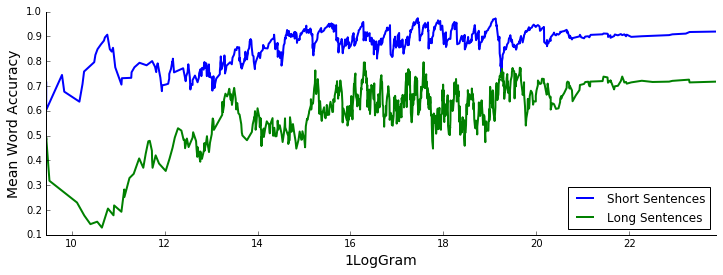

In [64]:
#Word Accuracy sorted by SubtlexUS Frequency 
bigPShort= bigP.loc[bigP['NumWordsInSentence'] <= 8,:]
vals = bigPShort.loc[:,('AllPhonsMatch','TargetWord','1LogGram')].groupby('TargetWord').mean().sort_values(['1LogGram'], ascending = False)
vals = vals.groupby('1LogGram').mean()
filtered = pd.ewma(vals['AllPhonsMatch'],span =30)
ax = filtered.plot(kind='line',figsize = (12,4))
ax.set_ylabel('Mean Word Accuracy')
hide_spines()
bigPLong = bigP.loc[bigP['NumWordsInSentence'] > 8,:]
vals = bigPLong.loc[:,('AllPhonsMatch','TargetWord','1LogGram')].groupby('TargetWord').mean().sort_values(['1LogGram'], ascending = False)
vals = vals.groupby('1LogGram').mean()
filtered2 = pd.ewma(vals['AllPhonsMatch'],span =30)
ax = filtered2.plot(kind='line',figsize = (12,4))
ax.set_ylabel('Mean Word Accuracy')
ax.legend(labels = ['Short Sentences','Long Sentences'],loc='best')
hide_spines()


Subjects are much better at correctly reporting words that are more frequent in spoken English.